In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

In [6]:
df = pd.read_csv("data/processed/spotify_clean.csv")
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,NaN,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,3.844433
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,NaN,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2.493500
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,NaN,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,3.513767
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,NaN,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,3.365550
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,NaN,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,3.314217


In [16]:
print("Shape:", df.shape)
df.info()

Shape: (89741, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89741 entries, 0 to 89740
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          89741 non-null  object 
 1   artists           89740 non-null  object 
 2   album_name        89740 non-null  object 
 3   track_name        89740 non-null  object 
 4   popularity        89741 non-null  int64  
 5   duration_ms       89741 non-null  int64  
 6   explicit          0 non-null      float64
 7   danceability      89741 non-null  float64
 8   energy            89741 non-null  float64
 9   key               89741 non-null  int64  
 10  loudness          89741 non-null  float64
 11  mode              89741 non-null  int64  
 12  speechiness       89741 non-null  float64
 13  acousticness      89741 non-null  float64
 14  instrumentalness  89741 non-null  float64
 15  liveness          89741 non-null  float64
 16  valence           897

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,89741.0,33.198438,20.580824,0.000,19.0000,33.000000,49.000000,1.000000e+02
duration_ms,89741.0,229141.812182,112947.741190,0.000,173040.0000,213293.000000,264293.000000,5.237295e+06
explicit,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability,89741.0,0.562166,0.176691,0.000,0.4500,0.576000,0.692000,9.850000e-01
energy,89741.0,0.634458,0.256605,0.000,0.4570,0.676000,0.853000,1.000000e+00
key,89741.0,5.283549,3.559897,0.000,2.0000,5.000000,8.000000,1.100000e+01
loudness,89741.0,-8.499004,5.221490,-49.531,-10.3220,-7.185000,-5.108000,4.532000e+00
mode,89741.0,0.636966,0.480877,0.000,0.0000,1.000000,1.000000,1.000000e+00
speechiness,89741.0,0.087442,0.113277,0.000,0.0360,0.048900,0.085900,9.650000e-01
acousticness,89741.0,0.328289,0.338321,0.000,0.0171,0.188000,0.625000,9.960000e-01


In [17]:
# categorical summary
df.describe(include="object").T
#Interpretation:
# track_id: all unique (as expected).
# artists: 31k unique artists; most frequent = George Jones (260 tracks).
# track_name: 73k unique titles.
# track_genre: 113 genres; most frequent = acoustic (1000 tracks)

,count,unique,top,freq
track_id,89741,89741,2hETkH7cOfqmz3LqZDHZf5,1
artists,89740,31437,George Jones,260
album_name,89740,46589,The Complete Hank Williams,110
track_name,89740,73608,Rockin' Around The Christmas Tree,48
track_genre,89741,113,acoustic,1000


In [9]:
# missing values summary
df.isna().sum()
# interpretation:
# Only artists, album_name, track_name have 1 missing value each 
# explicit is all missing because it was not included in final dataset.

track_id                0
artists                 1
album_name              1
track_name              1
popularity              0
duration_ms             0
explicit            89741
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
track_genre             0
duration_min            0
dtype: int64

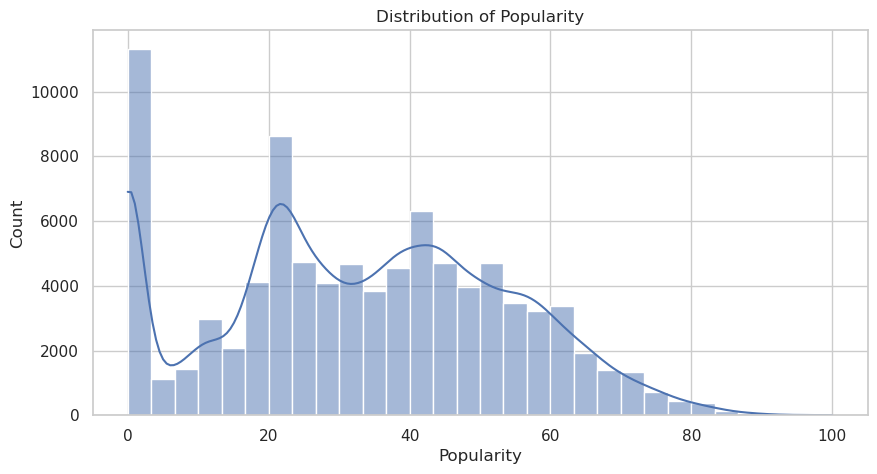

In [10]:
sns.histplot(df["popularity"], bins=30, kde=True)
plt.title("Distribution of Popularity")
plt.xlabel("Popularity")
plt.show()
# interpretation:
# Popularity is skewed right.
# Many songs have very low popularity, with smaller peaks around 20–50.
# Very few songs are extremely popular (>80).

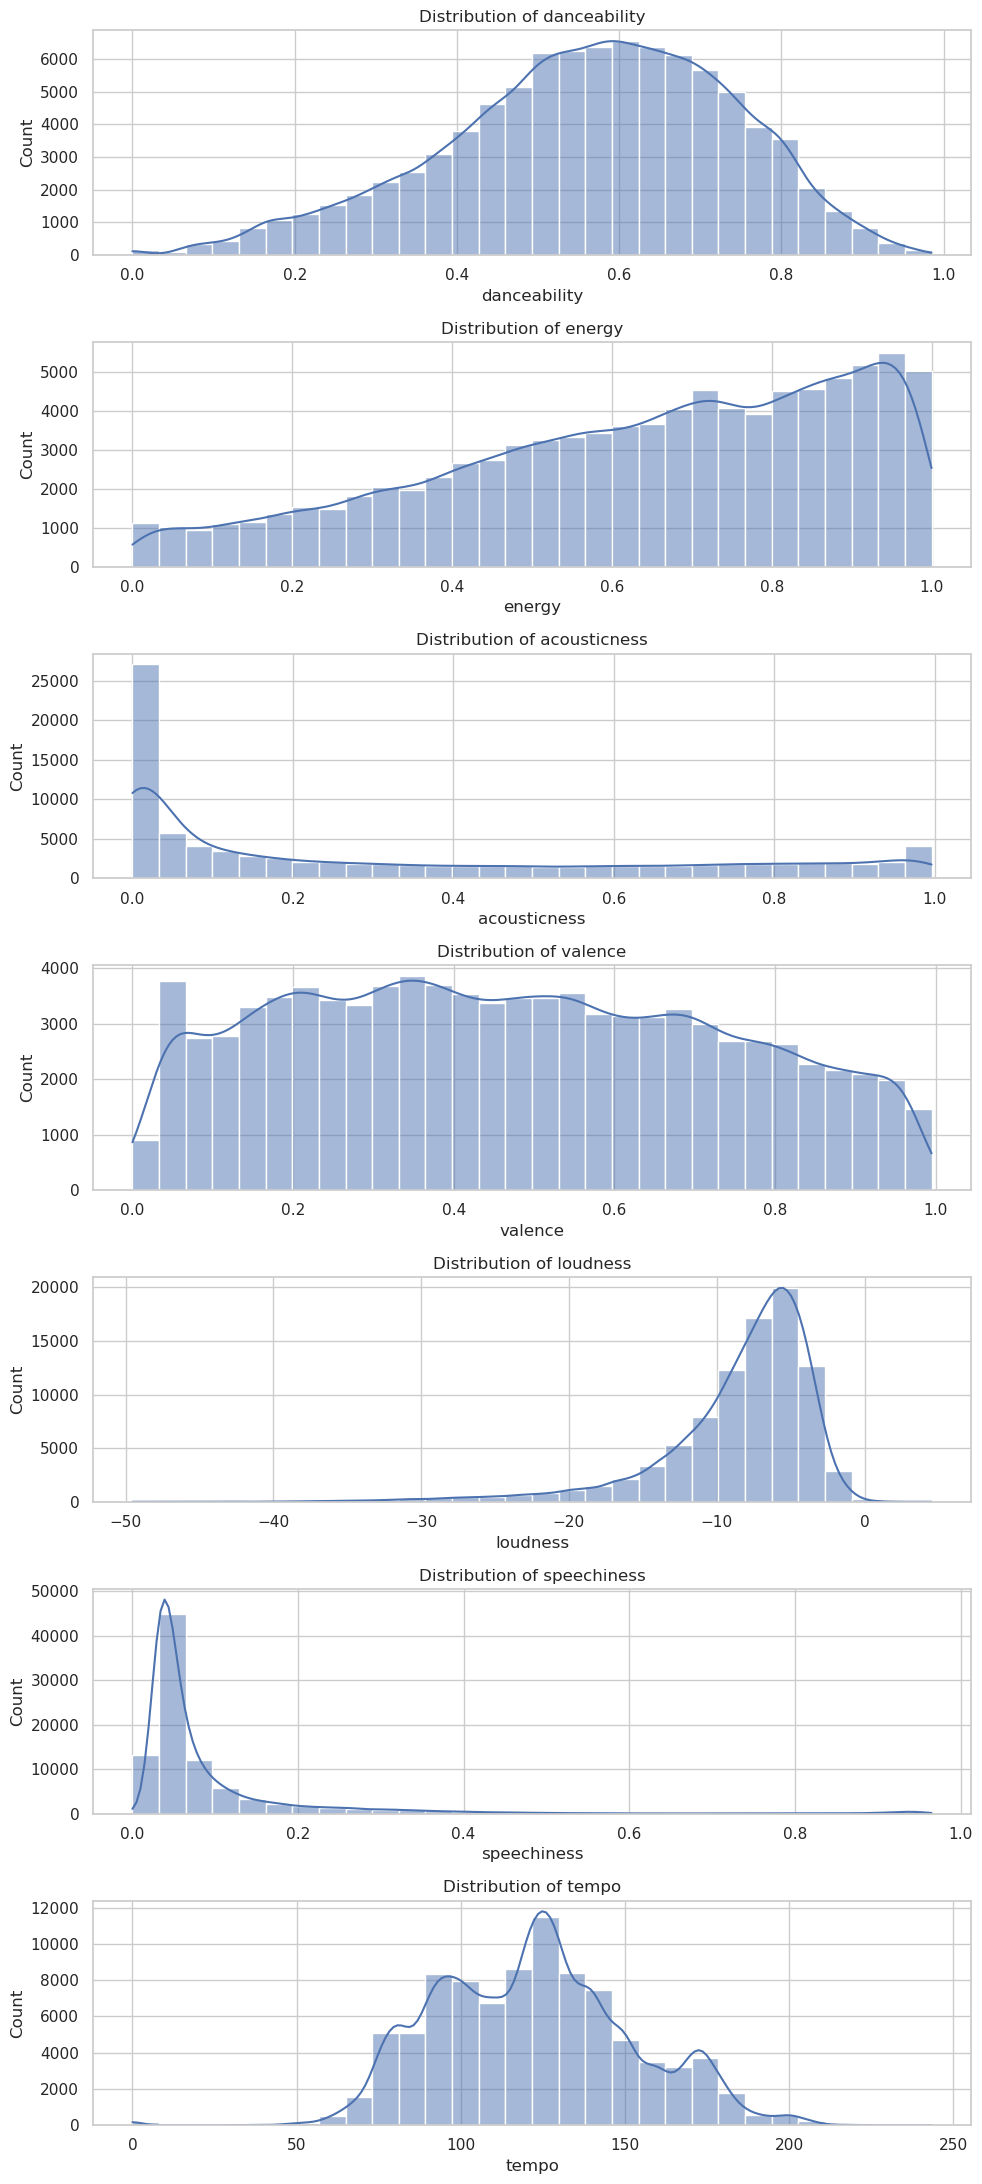

In [12]:
features = [
    "danceability", "energy", "acousticness",
    "valence", "loudness", "speechiness", "tempo"
]

fig, axes = plt.subplots(len(features), 1, figsize=(10, 22))

for i, col in enumerate(features):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()
 # interpretation:
# Danceability: centered around 0.6.
# Energy: high for most songs (0.6–0.9).
# Acousticness: heavily skewed → most songs are NOT acoustic.
# Valence: fairly uniform — songs range from sad to happy evenly.
# Loudness: normal distribution around -8 dB.
# Speechiness: mostly low → typical music, not spoken word.
# Tempo: typical values around 100–140 BPM.

In [14]:
corr["popularity"].sort_values(ascending=False)
# interpretation:
# No audio feature strongly predicts popularity.
# Highest positive correlation: loudness, but still very small.
# Highest negative correlation: instrumentalness → instrumental songs tend to be less popular.
# Popularity is not determined by audio features alone — likely influenced by artists, marketing, playlist placement, etc.

popularity          1.000000
loudness            0.071676
danceability        0.064281
time_signature      0.036893
energy              0.013728
tempo               0.007270
key                 0.003432
valence            -0.011526
liveness           -0.013844
mode               -0.016214
duration_ms        -0.023119
duration_min       -0.023119
acousticness       -0.038847
speechiness        -0.047081
instrumentalness   -0.127465
explicit                 NaN
Name: popularity, dtype: float64